In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import numpy as np

# %matplotlib widget

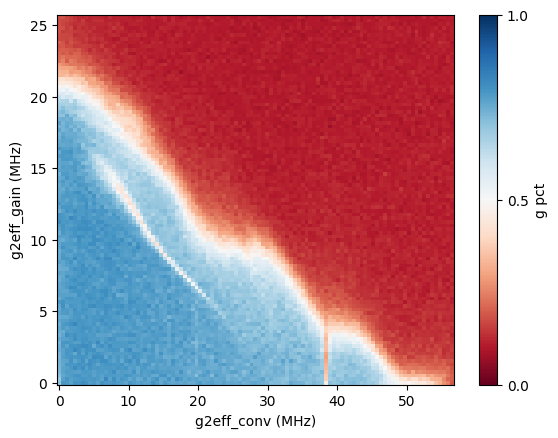

In [2]:
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.circuit.random import random_circuit
from slam.utils.transpiler_pass.weyl_decompose import RootiSwapWeylDecomposition as decomposer
from qiskit.transpiler.passes import Collect2qBlocks, ConsolidateBlocks, Unroll3qOrMore, Optimize1qGates
from slam.utils.gates.custom_gates import RiSwapGate
from qiskit.circuit.library import CXGate
from qiskit.converters import circuit_to_dag
from qiskit.transpiler.basepasses import TransformationPass
from qiskit.quantum_info import Operator
from slam.basis import MixedOrderBasisCircuitTemplate
from slam.utils.monodromy.polytope_wrap import monodromy_range_from_target
from slam.utils.gates.bgatev2script import get_group_name, cost_scaling, pick_winner, recursive_sibling_check, atomic_cost_scaling
from qiskit.transpiler.basepasses import AnalysisPass
from qiskit.transpiler.passes import CountOps
from qiskit.dagcircuit import DAGOpNode, DAGCircuit
from qiskit.transpiler import PassManager
from itertools import product

In [3]:
from slam.utils.circuit_suite import benchmark_lambdas

In [4]:
# load square-lattice coupling map or all-to-all
from qiskit.transpiler import CouplingMap
coupling_map = CouplingMap.from_grid(8,8)
# coupling_map = CouplingMap.from_full(16)

# load qiskit transpiler with pass for coupling map
induce_swaps = lambda qc: transpile(qc, coupling_map=CouplingMap.from_grid(8,8), optimization_level=3)

qc = benchmark_lambdas[3](16)
# turn off logging
logger.setLevel(logging.ERROR)
qc = induce_swaps(qc)
# turn back on logging
logger.setLevel(logging.INFO)

duration_1q = 0.1

In [5]:
from slam.utils.transpiler_pass.speed_limit_pass import pass_manager_basic, pass_manager_slam

In [6]:
qc = QuantumCircuit(2)
qc.cx(0,1)

INFO:qiskit.transpiler.runningpassmanager:Pass: CountOps - 0.01192 (ms)
INFO:root:
Transpilation Results:
INFO:root:Gate Counts: {'cx': 1}
INFO:root:Longest Path Gate Counts: {'cx': 1}
INFO:root:Duration: 1
INFO:qiskit.transpiler.runningpassmanager:Pass: fooAnalysis - 2.92349 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.02098 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Collect2qBlocks - 0.05054 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ConsolidateBlocks - 1.06454 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: RootiSwapWeylDecomposition - 6.84786 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGates - 1.28126 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: CountOps - 0.01621 (ms)
INFO:root:
Transpilation Results:
INFO:root:Gate Counts: {'u3': 6, 'riswap': 2}
INFO:root:Longest Path Gate Counts: {'u3': 3, 'riswap': 2}
INFO:root:Duration: 1.3
INFO:qiskit.transpiler.runningpassmanager:Pass: fooAnalysis - 2.63143 (ms)


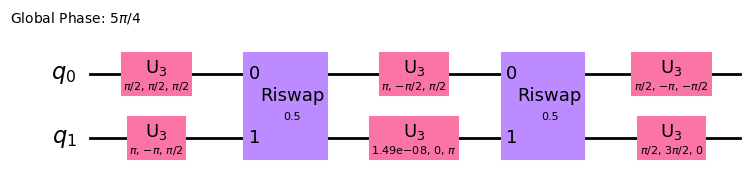

In [7]:
pm = pass_manager_basic(gate='sqiswap', duration_1q=duration_1q)
transp1 = pm.run(qc)
transp1.draw(output='mpl')

In [8]:
method = ['linear', 'mid', 'squared', 'hardware'][0]
strategy = ['basic_overall', 'lambda_weight', 'basic_smush', 'lambda_smush'][3]
use_fam = 0
pm = pass_manager_slam(strategy=strategy, family_extension=use_fam, speed_method=method, duration_1q=duration_1q, coupling_map=coupling_map)
transp0 = pm.run(qc)
transp0.draw(output='mpl')

INFO:qiskit.transpiler.runningpassmanager:Pass: CountOps - 0.01097 (ms)
INFO:root:
Transpilation Results:
INFO:root:Gate Counts: {'cx': 1}
INFO:root:Longest Path Gate Counts: {'cx': 1}
INFO:root:Duration: 1
INFO:qiskit.transpiler.runningpassmanager:Pass: fooAnalysis - 4.13680 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01264 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Collect2qBlocks - 0.04101 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ConsolidateBlocks - 1.11985 (ms)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/evm9/decomposition_EM/data/cg_gates.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)